<a href="https://colab.research.google.com/github/KKhushhalR2405/AlgoNOOB/blob/master/RestaurantStockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Restaurant-stock-prediction

/content/drive/MyDrive/Restaurant-stock-prediction


# MEAL STOCK PREDICTION : PROCUREMENT PLANNING FOR A MEAL DELIVERY COMPANY

#### by -

* Preeti Ranjan Panda (18BIT0202)
* Koyya Khushhal Reddy (18BIT0233)


## Importing Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
center_info = pd.read_csv('./dataset/fulfilment_center_info.csv')
meal_info = pd.read_csv('./dataset/meal_info.csv')
test_data = pd.read_csv('./dataset/test.csv')
train_data = pd.read_csv('./dataset/train.csv')

In [ ]:
center_info

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
...,...,...,...,...,...
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1


In [ ]:
meal_info

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian
5,1311,Extras,Thai
6,1062,Beverages,Italian
7,1778,Beverages,Italian
8,1803,Extras,Thai
9,1198,Extras,Thai


In [ ]:
test_data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0
...,...,...,...,...,...,...,...,...
32568,1250239,155,61,1543,482.09,484.09,0,0
32569,1039516,155,61,2304,483.09,483.09,0,0
32570,1158107,155,61,2664,322.07,323.07,0,0
32571,1444235,155,61,2569,322.07,323.07,0,0


In [ ]:
train_data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


## Merging Dataset

In [ ]:
merge1 = pd.merge(train_data, center_info, how='inner', on='center_id')

In [ ]:
merge1

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,473,77,TYPE_A,4.5
456544,1062036,145,61,2304,482.09,482.09,0,0,42,473,77,TYPE_A,4.5
456545,1110849,145,61,2664,237.68,321.07,0,0,501,473,77,TYPE_A,4.5
456546,1147725,145,61,2569,243.50,313.34,0,0,729,473,77,TYPE_A,4.5


In [ ]:
df = pd.merge(merge1, meal_info, how='inner', on='meal_id')

In [ ]:
df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,473,77,TYPE_A,4.5,Fish,Continental
456544,1060716,142,61,2104,581.03,582.03,0,0,42,473,77,TYPE_A,4.5,Fish,Continental
456545,1029231,143,61,2104,583.03,581.03,0,0,40,473,77,TYPE_A,4.5,Fish,Continental
456546,1141147,144,61,2104,582.03,581.03,0,0,53,473,77,TYPE_A,4.5,Fish,Continental


In [ ]:
df.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


In [ ]:
df = df.sort_values(by=['week'])  # Sorting by week

In [ ]:
df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
117582,1068257,1,13,2322,321.10,382.24,0,0,528,590,56,TYPE_B,6.7,Beverages,Continental
75371,1124219,1,97,1062,172.66,174.66,0,0,419,628,77,TYPE_A,4.6,Beverages,Italian
117726,1143940,1,109,2322,323.04,381.21,0,1,782,599,56,TYPE_A,3.6,Beverages,Continental
117871,1062683,1,52,2322,323.04,374.45,0,0,256,685,56,TYPE_B,5.6,Beverages,Continental
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5438,1449758,145,14,1885,159.11,158.11,0,0,676,654,56,TYPE_C,2.7,Beverages,Thai
298135,1229426,145,10,2867,648.02,727.53,0,0,42,590,56,TYPE_B,6.3,Seafood,Continental
138447,1483077,145,23,2290,238.62,274.57,0,0,134,698,23,TYPE_A,3.4,Rice Bowl,Indian
191465,1311738,145,186,2826,327.92,327.92,0,0,162,649,34,TYPE_A,3.4,Sandwich,Italian


In [ ]:
for i in df.columns:
    print(i)
    print('Unique Values: '+str(len(df.groupby([i]).count())))
    print(df[i].value_counts())

id
Unique Values: 456548
1050623    1
1166483    1
1141895    1
1119368    1
1121417    1
          ..
1389043    1
1378804    1
1376757    1
1382902    1
1048576    1
Name: id, Length: 456548, dtype: int64
week
Unique Values: 145
122    3359
105    3348
106    3347
140    3332
123    3331
       ... 
13     2838
12     2831
14     2830
7      2795
8      2786
Name: week, Length: 145, dtype: int64
center_id
Unique Values: 77
13     7046
10     7015
52     6993
43     6970
67     6915
       ... 
139    4627
57     4501
162    4366
41     4083
91     3432
Name: center_id, Length: 77, dtype: int64
meal_id
Unique Values: 51
2290    11138
1062    11137
1727    11136
1109    11134
1754    11132
2707    11123
1778    11121
1993    11116
1962    11114
1971    11102
1885    11092
2581    11072
2826    11057
2322    11002
1558    10952
1207    10806
2640    10747
1230    10746
1878    10527
2631    10458
2539    10451
1543    10236
2760    10209
1248     9939
2664     9853
2704     9811
1445   

In [ ]:
num_cols=['center_id',
 'meal_id',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'num_orders',
 'city_code',
 'region_code',
 'op_area']

In [ ]:
colors=['#b84949', '#ff6f00', '#ffbb00', '#9dff00', '#329906', '#439c55', '#67c79e', '#00a1db', '#002254', '#5313c2', '#c40fdb', '#e354aa']

In [ ]:
ts_tot_orders = df.groupby(['week'])['num_orders'].sum()
ts_tot_orders = pd.DataFrame(ts_tot_orders)
ts_tot_orders

,num_orders
week,
1,792261
2,787084
3,695262
4,743529
5,1198675
...,...
141,776240
142,739661
143,759926


## Data Visualization

In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyoff
plot_data = [
    go.Scatter(
        x=ts_tot_orders.index,
        y=ts_tot_orders['num_orders'],
        name='Time Series for num_orders',
        marker = dict(color = 'Blue')
        
    )
]
plot_layout = go.Layout(
        title='Total orders per week',
        yaxis_title='Total orders',
        xaxis_title='Week',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)


In [ ]:
center_id = df.groupby(['center_id'])['num_orders'].sum()
center_id = pd.DataFrame(center_id)

In [ ]:
center_id=center_id.reset_index()

In [ ]:
import plotly.express as px
fig = px.bar(center_id, x="center_id", y="num_orders", color='center_id')
fig.update_layout({
'plot_bgcolor': 'rgba(1, 1, 1, 1)',
'paper_bgcolor': 'rgba(1, 1, 1, 1)',
})

fig.show()

In [ ]:
meal_id = df.groupby(['meal_id'])['num_orders'].sum()
meal_id = pd.DataFrame(meal_id)

In [ ]:
meal_id=meal_id.reset_index()

In [ ]:
import plotly.express as px
fig = px.bar(meal_id, x="meal_id", y="num_orders")
fig.update_layout({
'plot_bgcolor': 'rgba(1, 1, 1, 1)',
'paper_bgcolor': 'rgba(1, 1, 1, 1)',
})

fig.show()

In [ ]:
cat_var = ['center_type',
 'category',
 'cuisine']

In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyoff
for i in cat_var:
    grp=df.groupby([i])
    grp=pd.DataFrame(grp)
    lis=grp[0]
    x=0
    for j in lis:
        print(i)
        print(j)
        data = df[df[i]==j]
        data = pd.DataFrame(data)
        tot_orders = data.groupby(['week'])['num_orders'].sum()
        tot_orders = pd.DataFrame(tot_orders)
        plot_data = [
            go.Scatter(
                x=tot_orders.index,
                y=tot_orders['num_orders'],
                name='Time Series for num_orders for '+str(j),
                marker = dict(color = colors[x%12])
                #x_axis="OTI",
                #y_axis="time",
            )
        ]
        plot_layout = go.Layout(
                title='Total orders per week for '+str(j),
                yaxis_title='Total orders',
                xaxis_title='Week',
                plot_bgcolor='rgba(0,0,0,0)'
            )
        fig = go.Figure(data=plot_data, layout=plot_layout)
        x+=1
        pyoff.iplot(fig)

center_type
TYPE_A


center_type
TYPE_B


center_type
TYPE_C


category
Beverages


category
Biryani


category
Desert


category
Extras


category
Fish


category
Other Snacks


category
Pasta


category
Pizza


category
Rice Bowl


category
Salad


category
Sandwich


category
Seafood


category
Soup


category
Starters


cuisine
Continental


cuisine
Indian


cuisine
Italian


cuisine
Thai


### Overlapping graph for Comparision

In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyoff
for i in cat_var:
    grp=df.groupby([i])
    grp=pd.DataFrame(grp)
    lis=grp[0]
    x=0
    plot_data=[]
    for j in lis:
        print(i)
        print(j)
        data = df[df[i]==j]
        data = pd.DataFrame(data)
        tot_orders = data.groupby(['week'])['num_orders'].sum()
        tot_orders = pd.DataFrame(tot_orders)
       
        plot_data.append(go.Scatter(
                x=tot_orders.index,
                y=tot_orders['num_orders'],
                name=str(j),
                #marker = dict(color = colors[x%12])
                #x_axis="OTI",
                #y_axis="time",
            ))
        
        x+=1
    plot_layout = go.Layout(
            title='Total orders per week for '+str(i),
            yaxis_title='Total orders',
            xaxis_title='Week',
            plot_bgcolor='rgba(0,0,0,0)'
        )
    fig = go.Figure(data=plot_data, layout=plot_layout)
    pyoff.iplot(fig)

center_type
TYPE_A
center_type
TYPE_B
center_type
TYPE_C


category
Beverages
category
Biryani
category
Desert
category
Extras
category
Fish
category
Other Snacks
category
Pasta
category
Pizza
category
Rice Bowl
category
Salad
category
Sandwich
category
Seafood
category
Soup
category
Starters


cuisine
Continental
cuisine
Indian
cuisine
Italian
cuisine
Thai


### Heatmap for checking correlation 

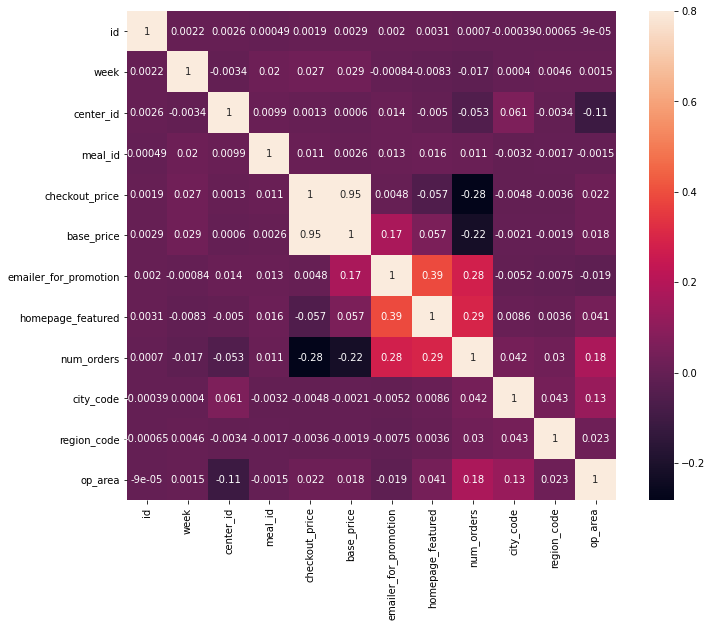

In [ ]:
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True, annot = True)
plt.show()

Checkout_price, base_price show negative correlation while emailer_promotion and homepage_feature show positive correlation with num_orders.

### Analysis of 'num_orders' with categorical data

In [ ]:
center_type = df.groupby(['center_type'])['num_orders'].sum()
center_type = pd.DataFrame(center_type)

In [ ]:
center_type

,num_orders
center_type,
TYPE_A,68978517
TYPE_B,29996073
TYPE_C,20582895


In [ ]:
center_type=center_type.reset_index()

In [ ]:
import plotly.express as px
fig = px.bar(center_type, x="center_type", y="num_orders", color='center_type')
fig.update_layout({
'plot_bgcolor': 'rgba(1, 1, 1, 1)',
'paper_bgcolor': 'rgba(1, 1, 1, 1)',
})

fig.show()

In [ ]:
category = df.groupby(['category'])['num_orders'].sum()
category = pd.DataFrame(category)

In [ ]:
category = category.reset_index()

In [ ]:
import plotly.express as px
fig = px.bar(category, x="category", y="num_orders", color='category')
fig.update_layout({
'plot_bgcolor': 'rgba(1, 1, 1, 1)',
'paper_bgcolor': 'rgba(1, 1, 1, 1)',
})
fig.show()

In [ ]:
cuisine = df.groupby(['cuisine'])['num_orders'].sum()
cuisine = pd.DataFrame(cuisine)

In [ ]:
cuisine = cuisine.reset_index()

In [ ]:
import plotly.express as px
fig = px.bar(cuisine, x="cuisine", y="num_orders", color='cuisine')
fig.update_layout({
'plot_bgcolor': 'rgba(1, 1, 1, 1)',
'paper_bgcolor': 'rgba(1, 1, 1, 1)',
})
fig.show()

## Bivariate analysis of Categorical data

In [ ]:
cat_ct=df.groupby(['category', 'center_type'])['num_orders'].sum()

In [ ]:
cat_ct = cat_ct.unstack().fillna(0)
cat_ct

center_type,TYPE_A,TYPE_B,TYPE_C
category,,,
Beverages,24633857,9340360,6506308
Biryani,348112,228273,55463
Desert,1006575,597142,337037
Extras,2385158,1251120,348701
Fish,468892,375444,27623
Other Snacks,2721316,1755359,289618
Pasta,893619,530987,213138
Pizza,4178759,1585932,1619029
Rice Bowl,11847850,5519104,3507109


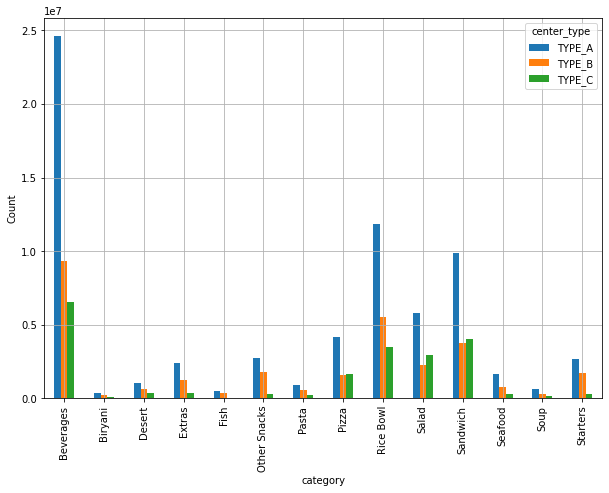

In [ ]:
ax = (cat_ct).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Count')
plt.show()

In [ ]:
cat_cu=df.groupby(['category', 'cuisine'])['num_orders'].sum()
cat_cu = cat_cu.unstack().fillna(0)
cat_cu

cuisine,Continental,Indian,Italian,Thai
category,,,,
Beverages,5943046.0,2345879.0,13953970.0,18237630.0
Biryani,0.0,631848.0,0.0,0.0
Desert,0.0,1940754.0,0.0,0.0
Extras,0.0,0.0,0.0,3984979.0
Fish,871959.0,0.0,0.0,0.0
Other Snacks,0.0,0.0,0.0,4766293.0
Pasta,0.0,0.0,1637744.0,0.0
Pizza,7383720.0,0.0,0.0,0.0
Rice Bowl,0.0,20874063.0,0.0,0.0


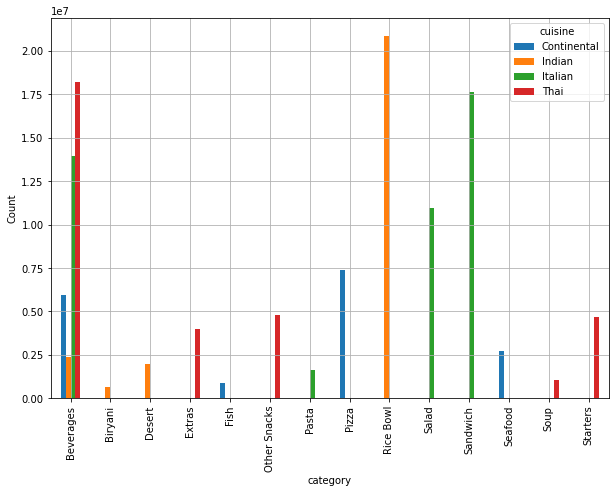

In [ ]:
ax = (cat_cu).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Count')
plt.show()

In [ ]:
ct_cu=df.groupby(['center_type', 'cuisine'])['num_orders'].sum()
ct_cu = ct_cu.unstack().fillna(0)
ct_cu

cuisine,Continental,Indian,Italian,Thai
center_type,,,,
TYPE_A,9874117,14512558,24778761,19813081
TYPE_B,3559456,6944518,9939385,9552714
TYPE_C,3480866,4335468,9454686,3311875


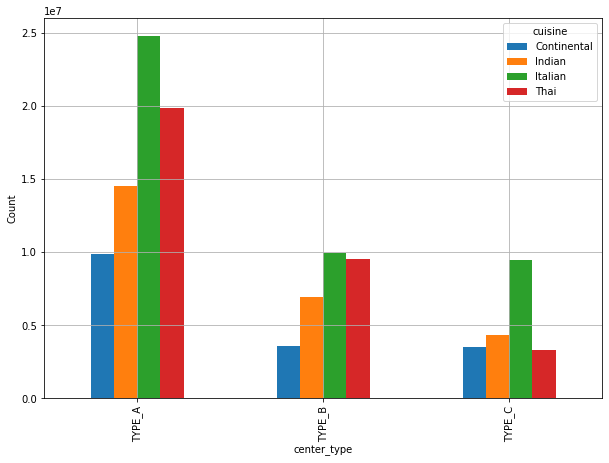

In [ ]:
ax = (ct_cu).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Count')
plt.show()

## A bivariate plot between few numrical variables with num_orders.

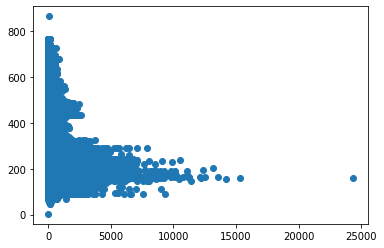

In [ ]:
x = df['num_orders']
y = df['checkout_price']

plt.scatter(x, y)
plt.show()

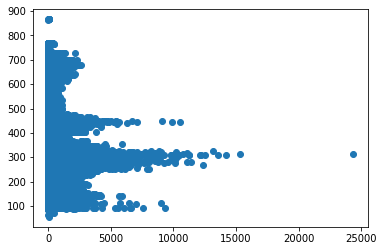

In [ ]:
x = df['num_orders']
y = df['base_price']

plt.scatter(x, y)
plt.show()

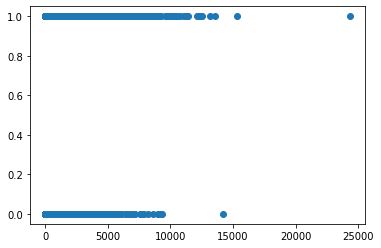

In [ ]:
x = df['num_orders']
y = df['emailer_for_promotion']

plt.scatter(x, y)
plt.show()

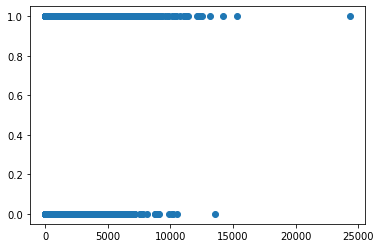

In [ ]:
x = df['num_orders']
y = df['homepage_featured']

plt.scatter(x, y)
plt.show()

## Predictive Modeling using Regression Methods

In [2]:
df_=df.copy()

In [ ]:
#Converting Categorical data to numerical

for i in cat_var:
    df_[i] = pd.factorize(df_[i])[0]

In [ ]:
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import metrics
%matplotlib inline

In [ ]:
X = df_.drop(['num_orders'], axis=1).values
y = df_['num_orders'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Algo 1  : Linear Regression

In [ ]:
lr = LinearRegression()  
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Root Mean Squared Error for LinearRegression:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error for LinearRegression: 338.96736533645355


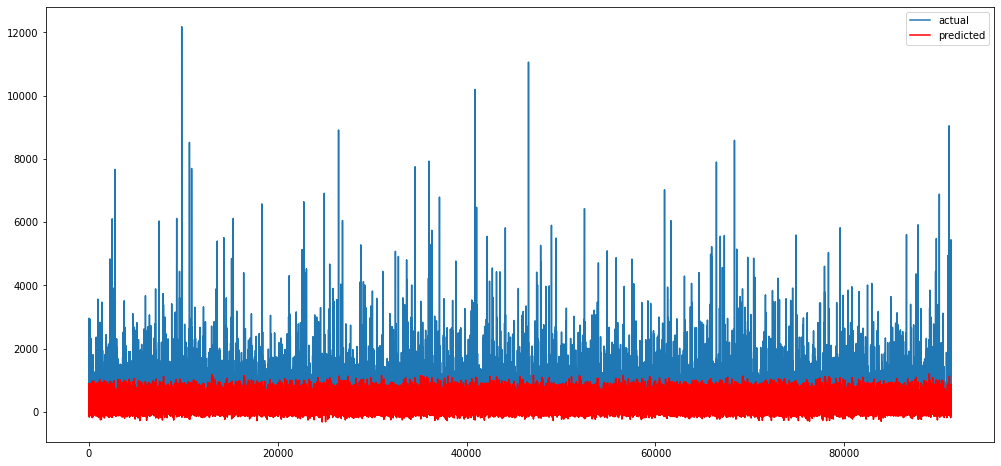

In [ ]:
from matplotlib import pyplot
pyplot.figure(figsize=(17, 8))
pyplot.plot(y_test, label="actual")
pyplot.plot(y_pred, color='red', label="predicted")
pyplot.legend(loc='best')
#pyplot.plot(predictions, color='red')
pyplot.show()

## Algo 2 : KNN Regressor

In [ ]:
knn = KNeighborsRegressor()  
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Root Mean Squared Error for knn:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error for knn: 371.82033465440304


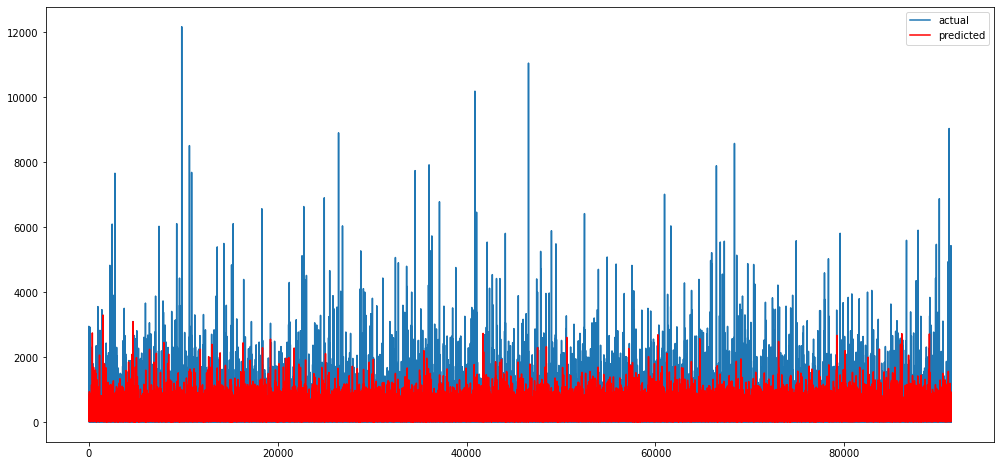

In [ ]:
from matplotlib import pyplot
pyplot.figure(figsize=(17, 8))
pyplot.plot(y_test, label="actual")
pyplot.plot(y_pred, color='red', label="predicted")
pyplot.legend(loc='best')
#pyplot.plot(predictions, color='red')
pyplot.show()

## Algo 3 : Decision Tree Regressor

In [ ]:
dt = DecisionTreeRegressor()  
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Root Mean Squared Error for DecisionTree:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error for DecisionTree: 213.90377507605194


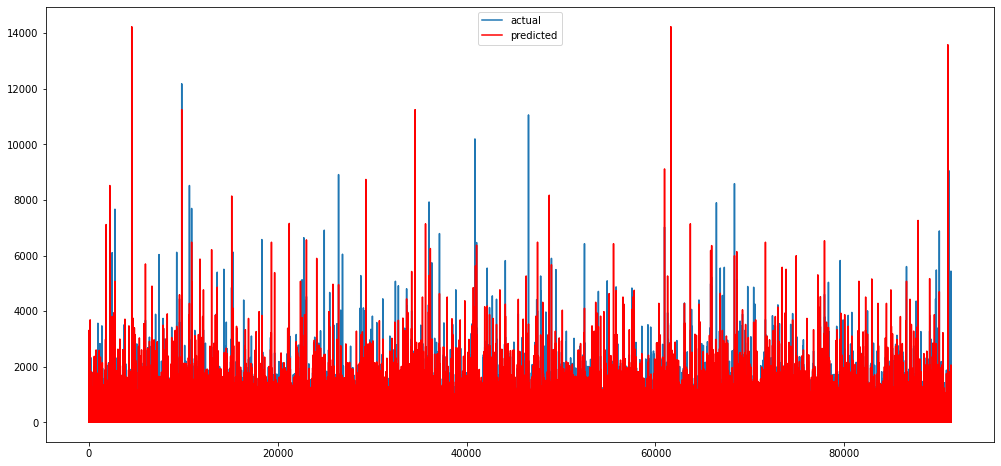

In [ ]:
from matplotlib import pyplot
pyplot.figure(figsize=(17, 8))
pyplot.plot(y_test, label="actual")
pyplot.plot(y_pred, color='red', label="predicted")
pyplot.legend(loc='best')
#pyplot.plot(predictions, color='red')
pyplot.show()

## Algo 4 : Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Root Mean Squared Error for rf:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error for rf: 154.0266080465612


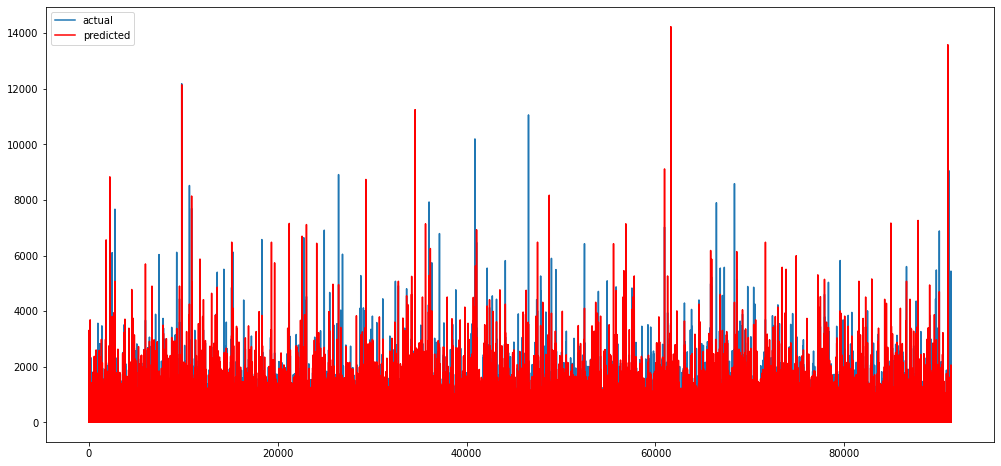

In [ ]:
from matplotlib import pyplot
pyplot.figure(figsize=(17, 8))
pyplot.plot(y_test, label="actual")
pyplot.plot(y_pred, color='red', label="predicted")
pyplot.legend(loc='best')
#pyplot.plot(predictions, color='red')
pyplot.show()

## Algo 5 : XGBoost

In [ ]:
import xgboost as xgb


In [ ]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error

In [ ]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse=mean_squared_error(y_test, y_pred)

print(np.sqrt(mse))

[16:33:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
234.31985054049062


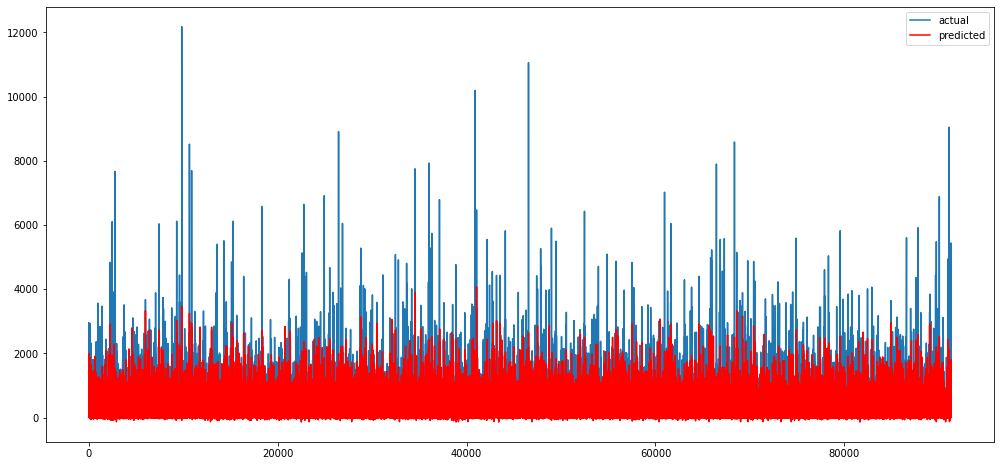

In [ ]:
from matplotlib import pyplot
pyplot.figure(figsize=(17, 8))
pyplot.plot(y_test, label="actual")
pyplot.plot(y_pred, color='red', label="predicted")
pyplot.legend(loc='best')
#pyplot.plot(predictions, color='red')
pyplot.show()

## Comparisions of algorithms

MSE for Linear Regression : 338.96

MSE for KNN Regressor : 371.82

MSE for Decision Tree Regressor : 213.60

MSE for Random Forest : 154.60

MSE for XGBoost : 234.31


Clearly RAndom Forest has shown the best performance, so we will consider this model to predict the future demands

## Model Training

In [ ]:
training = df.loc[:, ['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders']] 

In [ ]:
training

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
117582,1068257,1,13,2322,321.10,382.24,0,0,528
75371,1124219,1,97,1062,172.66,174.66,0,0,419
117726,1143940,1,109,2322,323.04,381.21,0,1,782
117871,1062683,1,52,2322,323.04,374.45,0,0,256
...,...,...,...,...,...,...,...,...,...
5438,1449758,145,14,1885,159.11,158.11,0,0,676
298135,1229426,145,10,2867,648.02,727.53,0,0,42
138447,1483077,145,23,2290,238.62,274.57,0,0,134
191465,1311738,145,186,2826,327.92,327.92,0,0,162


In [ ]:
X_train = training.drop(['num_orders'], axis=1).values
y_train = training['num_orders'].values

In [ ]:
X_test = test_data.values

In [ ]:
from sklearn.ensemble import RandomForestRegressor 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)


Root Mean Squared Error for rf: 234.31985054049062


In [ ]:
y_pred = regressor.predict(X_test)


In [ ]:
ypred = pd.DataFrame(y_pred)

In [ ]:
predictions = pd.merge(test_data, ypred, left_index=True, right_index=True, how='inner')

In [ ]:
# combining predicted data with test data to form a singe data frame for plotting time series wise.
predictions = pd.merge(test_data, ypred, left_index=True, right_index=True, how='inner')

In [ ]:
predictions['num_orders'] = predictions[0]

In [ ]:
predictions = predictions.drop([0], axis=1)

In [ ]:
ts_tot_pred = predictions.groupby(['week'])['num_orders'].sum()
ts_tot_pred = pd.DataFrame(ts_tot_pred)

## Result of Our model

In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyoff
plot_data = [
    go.Scatter(
        x=ts_tot_orders.index,
        y=ts_tot_orders['num_orders'],
        name='Time Series for num_orders',
        marker = dict(color = 'Blue')
        #x_axis="OTI",
        #y_axis="time",
    ),
    go.Scatter(
        x=ts_tot_pred.index,
        y=ts_tot_pred['num_orders'],
        name='Predicted',
        marker = dict(color = 'Red')
        #x_axis="OTI",
        #y_axis="time",
    )
    
]
plot_layout = go.Layout(
        title='Total orders per week',
        yaxis_title='Total orders',
        xaxis_title='Week',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)